In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
dataset = tf.keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/himan/Downloads/archive (1)/PlantVillage',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 2152 files belonging to 3 classes.


In [32]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

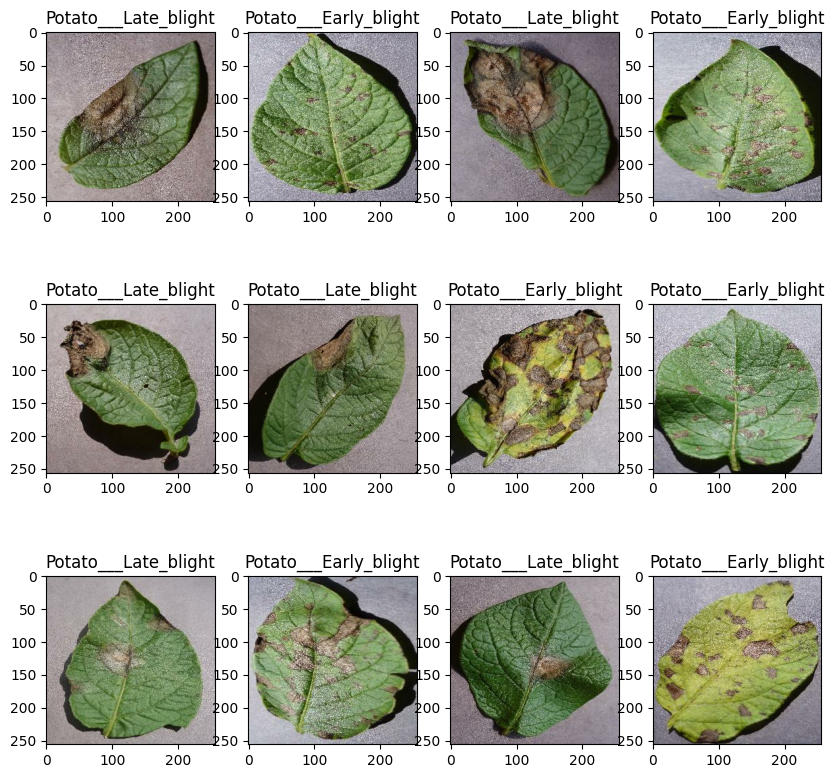

In [33]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(dataset.class_names[label_batch[i]])

# Spliting Data into Train,Test and Validation
### Train - 70%
### Validation - 10%
### Test - 20%

In [4]:
!split-folders --output dataset --ratio .7 .1 .2 -- PlantVillage/


Copying files: 0 files [00:00, ? files/s]
Copying files: 62 files [00:00, 620.00 files/s]
Copying files: 203 files [00:00, 1080.35 files/s]
Copying files: 349 files [00:00, 1248.39 files/s]
Copying files: 487 files [00:00, 1297.95 files/s]
Copying files: 628 files [00:00, 1334.69 files/s]
Copying files: 769 files [00:00, 1360.01 files/s]
Copying files: 917 files [00:00, 1397.14 files/s]
Copying files: 1057 files [00:00, 1349.10 files/s]
Copying files: 1193 files [00:01, 1056.54 files/s]
Copying files: 1335 files [00:01, 1148.70 files/s]
Copying files: 1473 files [00:01, 1210.20 files/s]
Copying files: 1614 files [00:01, 1261.74 files/s]
Copying files: 1746 files [00:01, 1219.73 files/s]
Copying files: 1879 files [00:01, 1250.33 files/s]
Copying files: 2010 files [00:01, 1263.69 files/s]
Copying files: 2144 files [00:01, 1285.65 files/s]
Copying files: 2152 files [00:01, 1241.33 files/s]


In [3]:
!pip install split-folders


# Data Augmentation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
   
)

val_dataget = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    horizontal_flip=True
)

In [36]:
train_value = train_datagen.flow_from_directory(
    directory = './dataset/train/',
    target_size =(256,256),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 1506 images belonging to 3 classes.


In [37]:
val_value = val_dataget.flow_from_directory(
    directory = './dataset/val/',
    target_size =(256,256),
    batch_size = 32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [18]:
test_value = test_datagen.flow_from_directory(
    directory='./dataset/test/',
    target_size =(256,256),
    batch_size = 32,
    class_mode='sparse'
    
    
)

Found 431 images belonging to 3 classes.


# Building CNN Model

In [43]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,InputLayer,BatchNormalization,Dropout
from tensorflow.keras import Sequential

In [49]:
model = Sequential()
model.add(InputLayer(shape=(256,256,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),optimizer='adam',
             metrics=['accuracy'])

In [51]:
history = model.fit(
    train_value,
    steps_per_epoch=1506 // 32,
    batch_size=32,
    validation_data=val_value,
    validation_steps=215 // 32,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4355 - loss: 0.9541 - val_accuracy: 0.5156 - val_loss: 0.8823
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3438 - loss: 0.5406 - val_accuracy: 0.6087 - val_loss: 0.4011
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6064 - loss: 0.8423 - val_accuracy: 0.7135 - val_loss: 0.6837
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 0.3645 - val_accuracy: 0.7391 - val_loss: 0.4144
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6860 - loss: 0.7261 - val_accuracy: 0.8333 - val_loss: 0.4500
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.1483 - val_accuracy: 0.7391 - val_loss: 0.2943
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7828 - loss: 0.5375 - val_accuracy: 0.8854 - val_loss: 0.3522
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.1027 - val_accuracy: 0.8261 - val_loss:

In [63]:
model.evaluate(test_value)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.9066 - loss: 0.2519


[0.20632556080818176, 0.9141531586647034]

In [59]:
model2 = Sequential()
model2.add(InputLayer(shape=(256,256,3)))

model2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(3,activation='softmax'))

model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,731 (725.51 KB)

 Trainable params: 185,731 (725.51 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history2 = model2.fit(
    train_value,
    steps_per_epoch=1506 // 32,
    batch_size=32,
    validation_data=val_value,
    validation_steps=215 // 32,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4567 - loss: 0.9445 - val_accuracy: 0.4635 - val_loss: 0.8974
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4375 - loss: 0.4564 - val_accuracy: 0.4783 - val_loss: 0.4614
Epoch 3/20


C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6037 - loss: 0.8380 - val_accuracy: 0.7969 - val_loss: 0.4301
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.2401 - val_accuracy: 0.7391 - val_loss: 0.2443
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8266 - loss: 0.4190 - val_accuracy: 0.8750 - val_loss: 0.5161
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.2705 - val_accuracy: 0.7826 - val_loss: 0.2856
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7749 - loss: 0.5344 - val_accuracy: 0.7812 - val_loss: 0.4539
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.1879 - val_accuracy: 0.9565 - val_loss: 0.0931
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8855 - loss: 0.2684 - val_accuracy: 0.8385 - val_loss: 0.3806
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9688 - loss: 0.1144 - val_accuracy: 0.8261 - val_loss: 0.1541
Ep

In [60]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),optimizer='adam',
             metrics=['accuracy'])

In [62]:
model2.evaluate(test_value)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.8372 - loss: 0.3943


[0.35140177607536316, 0.8561484813690186]

## After trail and Error We found Model 1 be the best model 

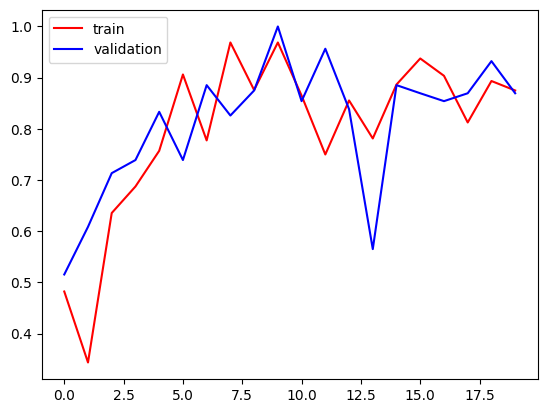

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

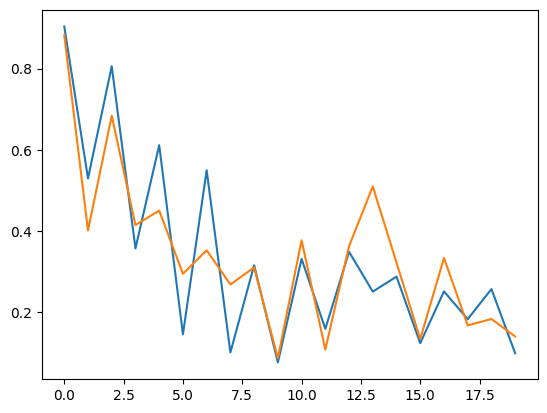

In [86]:
#Loss Graph
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')

# Conclusion

In [77]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [80]:
class_names = dataset.class_names

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


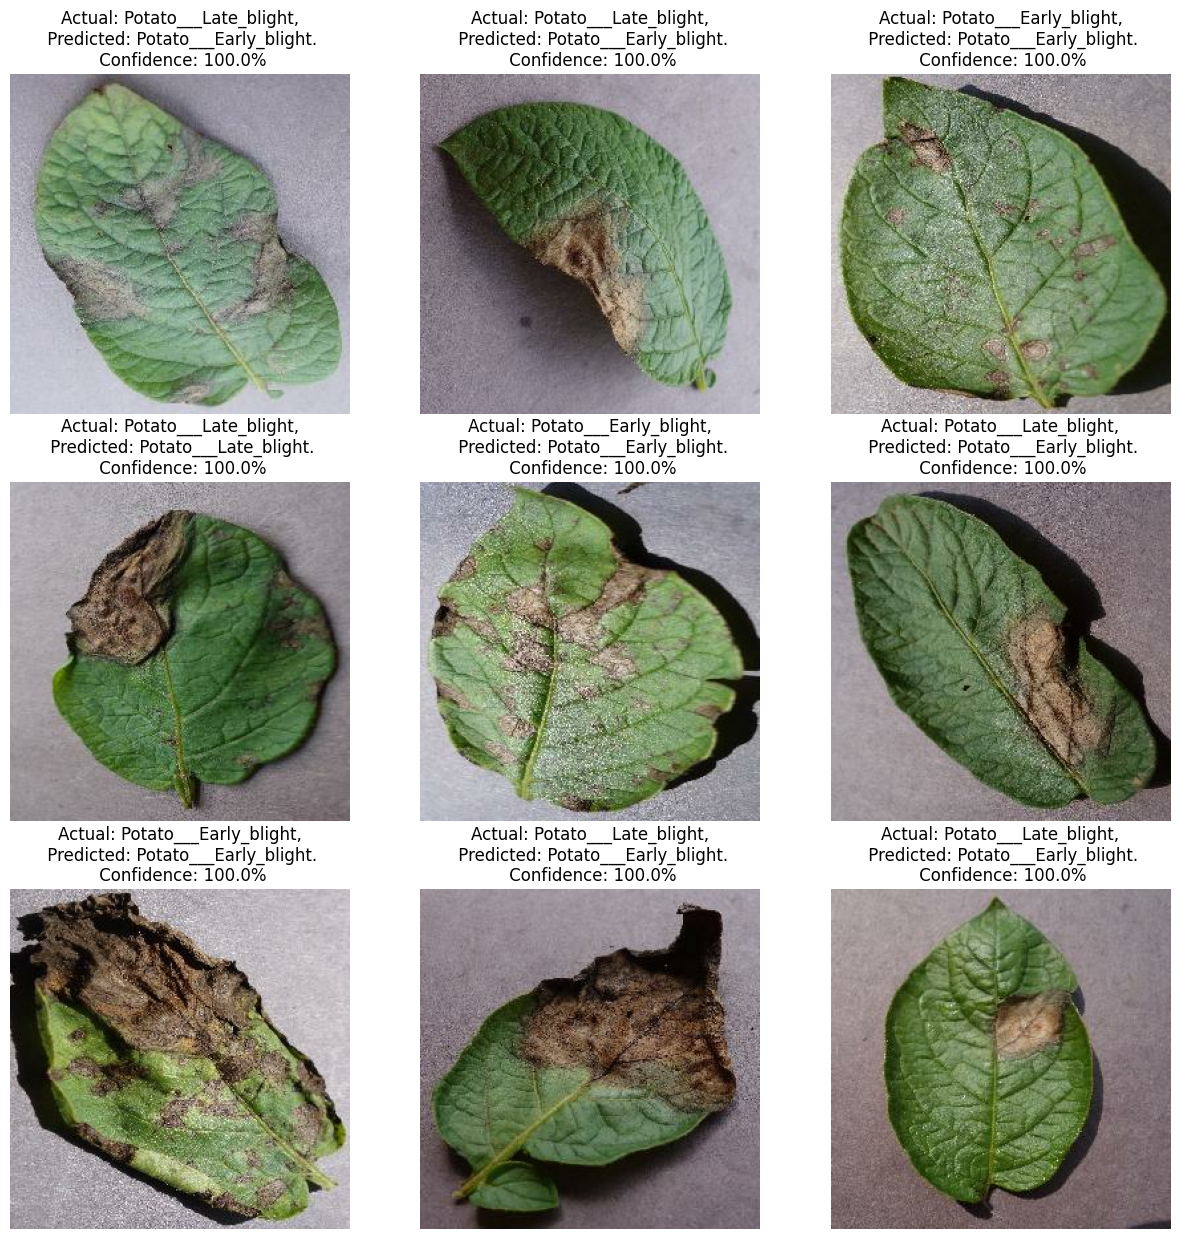

In [87]:
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")